In [1]:
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

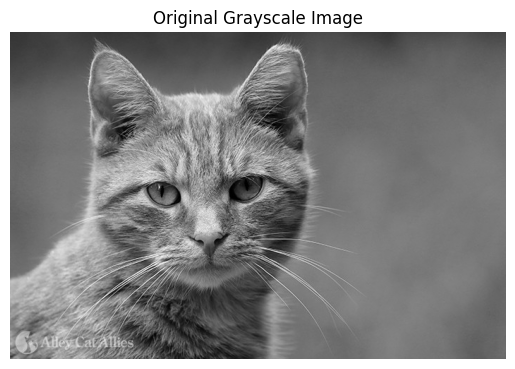

In [2]:
img = cv2.imread('./data-prep/img-data/img/FELV-cat.jpg') # Adjust the path as necessary

if img is None:
	raise FileNotFoundError("Image file not found. Please check the path.")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')
plt.show()

## Image Filters

Image filters adalah teknik dalam pengolahan citra digital yang melibatkan penggunaan kernel atau matriks kecil untuk memodifikasi nilai piksel dalam citra. Filter ini digunakan untuk berbagai tujuan, seperti mengurangi noise, meningkatkan tepi, atau menerapkan efek artistik. Berikut adalah beberapa jenis filter umum yang sering digunakan dalam pengolahan citra:
1. Smoothing Filters (Low-pass filters)
2. Sharpening Filters (High-pass filters)
3. Edge Detection Filters
4. Embossing Filters
5. Custom Convolution Filters

### Filter Kernel

Filter kernel adalah matriks kecil yang digunakan dalam operasi konvolusi untuk memodifikasi nilai piksel dalam citra. Kernel ini diterapkan pada setiap piksel citra dengan cara mengalikan nilai piksel tetangga dengan nilai kernel yang sesuai, kemudian menjumlahkan hasilnya untuk mendapatkan nilai baru piksel tersebut. Kernel dapat memiliki berbagai ukuran dan bentuk, tergantung pada efek yang diinginkan.

#### Perbedaan Filter dan Point Operations
| Aspek                  | Filter Kernel                                   | Point Operations                             |
|-----------------------|-------------------------------------------------|----------------------------------------------|
| Definisi              | Menggunakan kernel untuk memodifikasi piksel berdasarkan tetangga | Memanipulasi nilai piksel secara individual tanpa mempertimbangkan tetangga |
| Operasi              | Melibatkan konvolusi dengan kernel             | Melibatkan operasi matematis langsung pada piksel |
| Efek pada Citra      | Mempengaruhi area sekitar piksel				  | Mempengaruhi hanya piksel itu sendiri         |
| Contoh                | Gaussian Blur, Sharpening, Edge Detection | Brightness Adjustment, Contrast Adjustment    |

#### Linear Filters
Linear filters adalah jenis filter yang menggunakan operasi linear pada nilai piksel dan tetangganya. Contoh umum dari linear filters adalah smoothing filters (seperti Gaussian blur) dan sharpening filters. Linear filters mempertahankan hubungan linear antara input dan output, sehingga efeknya dapat diprediksi dan dianalisis dengan mudah.


1. MATRIX PIXEL INPUT (7x7):


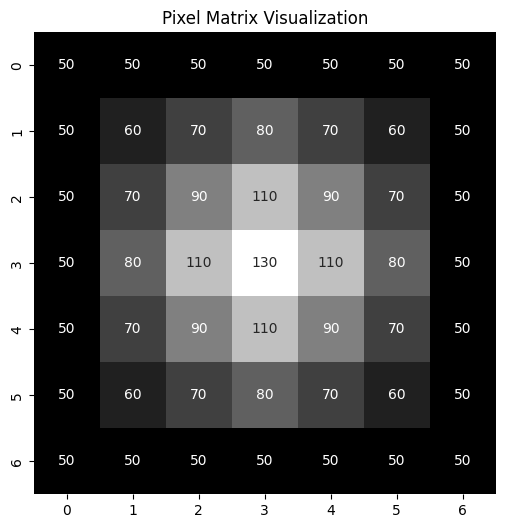

In [3]:
# Matrix pixel input (7x7)
pixel_matrix = np.array([
    [50,  50,  50,  50,  50,  50,  50],
    [50,  60,  70,  80,  70,  60,  50],
    [50,  70,  90, 110,  90,  70,  50],
    [50,  80, 110, 130, 110,  80,  50],
    [50,  70,  90, 110,  90,  70,  50],
    [50,  60,  70,  80,  70,  60,  50],
    [50,  50,  50,  50,  50,  50,  50]
], dtype=np.float32)

print("\n1. MATRIX PIXEL INPUT (7x7):")

# Visualisasi matrix pixel
plt.figure(figsize=(6, 6))
sns.heatmap(pixel_matrix, annot=True, fmt=".0f", cmap="gray", cbar=False, square=True)
plt.title("Pixel Matrix Visualization")
plt.show()


2a. AVERAGE/BOX BLUR KERNEL (3x3):


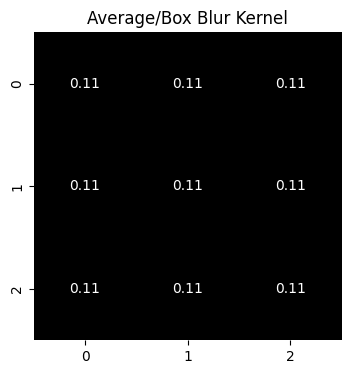

In [4]:
# 2. Definisikan berbagai kernel filter (3x3)
# a. Average/Box Blur Kernel
average_kernel = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
], dtype=np.float32) / 9

print("\n2a. AVERAGE/BOX BLUR KERNEL (3x3):")

# Visualisasi kernel
plt.figure(figsize=(4, 4))
sns.heatmap(average_kernel, annot=True, fmt=".2f", cmap="gray", cbar=False, square=True)
plt.title("Average/Box Blur Kernel")
plt.show()


Contoh Konvolusi pada Piksel Tengah [3, 3]:
Nilai Piksel Asli: 130

Region of Interest (ROI) 3x3:


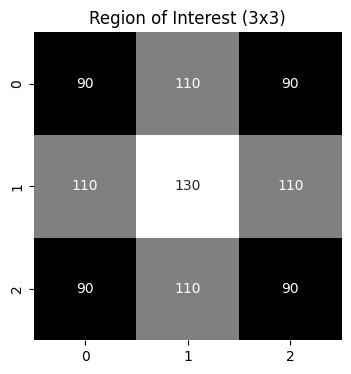

In [5]:
# Contoh detail konvolusi pada satu piksel (tengah matrix)
center_i, center_j = 3, 3
print(f"\nContoh Konvolusi pada Piksel Tengah [{center_i}, {center_j}]:")
print(f"Nilai Piksel Asli: {pixel_matrix[center_i, center_j]:.0f}")

# Ambil ROI 3x3 di sekitar piksel tengah
roi = pixel_matrix[center_i-1:center_i+2, center_j-1:center_j+2]
print(f"\nRegion of Interest (ROI) 3x3:")

# Visualisasi ROI
plt.figure(figsize=(4, 4))
sns.heatmap(roi, annot=True, fmt=".0f", cmap="gray", cbar=False, square=True)
plt.title("Region of Interest (3x3)")
plt.show()


Konvolusi dengan Average Kernel:
ROI × Kernel:


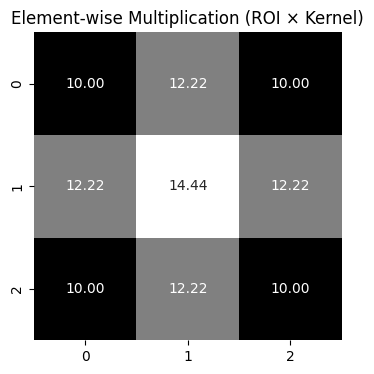

Sum (Hasil Konvolusi): 103.33


In [6]:
# Hitung konvolusi dengan Average Kernel
print(f"\nKonvolusi dengan Average Kernel:")
print("ROI × Kernel:")
element_wise = roi * average_kernel

# Visualisasi element-wise multiplication
plt.figure(figsize=(4, 4))
sns.heatmap(element_wise, annot=True, fmt=".2f", cmap="gray", cbar=False, square=True)
plt.title("Element-wise Multiplication (ROI × Kernel)")
plt.show()

result = np.sum(element_wise)
print(f"Sum (Hasil Konvolusi): {result:.2f}")


Ukuran Matrix Pixel: 7x7
Ukuran Kernel: 3x3
Padding yang Dibutuhkan: Height=1, Width=1


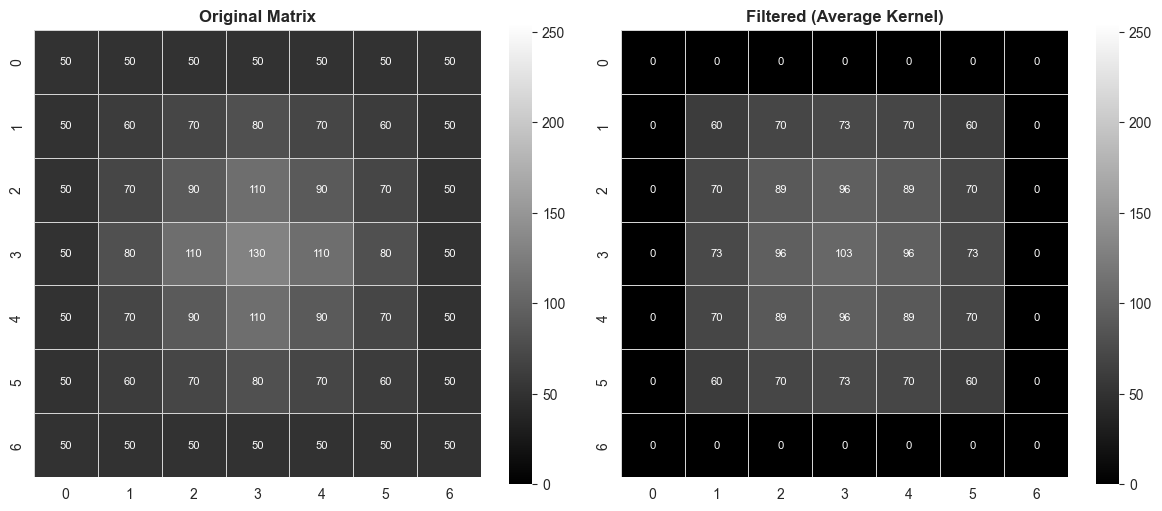

In [7]:
# Terapkan filter ke seluruh matrix pixel menggunakan konvolusi manual
img_height, img_width = pixel_matrix.shape
print(f"\nUkuran Matrix Pixel: {img_height}x{img_width}")
kernel_height, kernel_width = average_kernel.shape
print(f"Ukuran Kernel: {kernel_height}x{kernel_width}")

# Hitung padding yang dibutuhkan
pad_h = kernel_height // 2
pad_w = kernel_width // 2
print(f"Padding yang Dibutuhkan: Height={pad_h}, Width={pad_w}")

# Buat output matrix dengan ukuran yang sama dengan input
output = np.zeros_like(pixel_matrix)

# Lakukan konvolusi manual
for i in range(pad_h, img_height - pad_h):
    for j in range(pad_w, img_width - pad_w):
        # Ambil region of interest (ROI)
        roi = pixel_matrix[i-pad_h:i+pad_h+1, j-pad_w:j+pad_w+1]
        
        # Element-wise multiplication dan sum
        output[i, j] = np.sum(roi * average_kernel)


# Original
# Create figure with seaborn style
sns.set_style("white")
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original
sns.heatmap(pixel_matrix, annot=True, fmt='.0f', cmap='gray', cbar=True, 
            ax=axes[0], square=True, linewidths=0.5, linecolor='lightgray',
            vmin=0, vmax=255, annot_kws={"size": 8, "color": "white"})
axes[0].set_title('Original Matrix', fontsize=12, fontweight='bold')
axes[0].set_xlabel('')
axes[0].set_ylabel('')

# Filtered
sns.heatmap(output, annot=True, fmt='.0f', cmap='gray', cbar=True, 
            ax=axes[1], square=True, linewidths=0.5, linecolor='lightgray',
            vmin=0, vmax=255, annot_kws={"size": 8, "color": "white"})
axes[1].set_title('Filtered (Average Kernel)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

In [8]:
def manual_convolution(image, kernel):
    """
    Melakukan konvolusi manual antara image dan kernel
    """
    # Ukuran image dan kernel
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape
    
    # Hitung padding yang dibutuhkan
    pad_h = kernel_height // 2
    pad_w = kernel_width // 2
    
    # Buat output matrix dengan ukuran yang sama dengan input
    output = np.zeros_like(image)
    
    # Lakukan konvolusi
    for i in range(pad_h, img_height - pad_h):
        for j in range(pad_w, img_width - pad_w):
            # Ambil region of interest (ROI)
            roi = image[i-pad_h:i+pad_h+1, j-pad_w:j+pad_w+1]
            
            # Element-wise multiplication dan sum
            output[i, j] = np.sum(roi * kernel)
    
    return output

def visualize_comparison(original, output):
    sns.set_style("white")
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Original
    sns.heatmap(original, annot=True, fmt='.0f', cmap='gray', cbar=True, 
                ax=axes[0], square=True, linewidths=0.5, linecolor='lightgray',
                vmin=0, vmax=255, annot_kws={"size": 8, "color": "white"})
    axes[0].set_title('Original Matrix', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('')
    axes[0].set_ylabel('')

    # Filtered
    sns.heatmap(output, annot=True, fmt='.0f', cmap='gray', cbar=True, 
                ax=axes[1], square=True, linewidths=0.5, linecolor='lightgray',
                vmin=0, vmax=255, annot_kws={"size": 8, "color": "white"})
    axes[1].set_title('Filtered (Average Kernel)', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('')
    axes[1].set_ylabel('')

    plt.tight_layout()
    plt.show()

#### Latihan

Buat matrix piksel 10x10 dengan nilai random antara 0-255, kemudian terapkan filter dengan matrix berikut ini:

```
Filter Kernel:
┌─                 ─┐
| 0.075 0.125 0.075 |
| 0.125 0.200 0.125 |
| 0.075 0.125 0.075 |
└─                 ─┘
```
Visualisasikan matrix original, matrix filter, dan matrix hasil filter menggunakan heatmap dari seaborn.

In [9]:
# Tulis kode di sini


#### Contoh Kernel Umum
| Nama Kernel       | Ukuran | Deskripsi                                      | Contoh Kernel                      |
|-------------------|--------|------------------------------------------------|-----------------------------------|
| Gaussian Blur    | 3x3    | Mengurangi noise dengan efek blur               | `[[1, 2, 1], [2, 4, 2], [1, 2,1]] / 16` |
| Average/Box Blur | 3x3    | Menghaluskan citra dengan rata-rata piksel tetangga | `[[1, 1, 1], [1, 1, 1], [1, 1, 1]] / 9` |
| Sharpening       | 3x3    | Meningkatkan tepi dan detail citra               | `[[0, -1, 0], [-1, 5, -1], [0, -1, 0]]` |
| Edge Detection   | 3x3    | Mendeteksi tepi dalam citra                     | `[[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]` |
| Embossing        | 3x3    | Memberikan efek timbul pada citra                  | `[[-2, -1, 0], [-1, 1, 1], [0, 1, 2]]` |
| Custom Kernel    | NxN    | Kernel yang dapat disesuaikan untuk efek khusus         | Variabel sesuai kebutuhan         |

**Visualisasi Kernel:**

```
Gaussian Blur:          Average/Box Blur:       Sharpening: 
┌─              ─┐        ┌─             ─┐         ┌─           ─┐
│ 1/16 2/16 1/16 │        │ 1/9  1/9  1/9 │         │  0  -1   0  │
│ 2/16 4/16 2/16 │÷16     │ 1/9  1/9  1/9 │÷9       │ -1   5  -1  │
│ 1/16 2/16 1/16 │        │ 1/9  1/9  1/9 │         │  0  -1   0  │
└─              ─┘        └─             ─┘         └─           ─┘
Edge Detection:         Embossing:
┌─           ─┐       ┌─            ─┐
│ -1  -1  -1  │       │  -2  -1   0  │
│ -1   8  -1  │       │  -1   1   1  │
│ -1  -1  -1  │       │   0   1   2  │
└─           ─┘       └─            ─┘
```

### 1. Smoothing Filters (Low-pass filters)
**Konsep:**
Smoothing filters digunakan untuk mengurangi noise dan detail halus dalam citra. Filter ini bekerja dengan menggantikan nilai piksel dengan rata-rata atau median dari piksel tetangganya, sehingga menghasilkan efek blur yang menghaluskan citra.

**Implementasi:**
```python
# Menggunakan Gaussian Blur sebagai contoh smoothing filter
blurred = cv2.GaussianBlur(img, (3, 3), 0)
show_image(blurred, "Gaussian Blurred Image")
```

**`GaussianBlur()`**
Fungsi ini menerapkan Gaussian Blur pada citra. Parameter pertama adalah citra input, parameter kedua adalah ukuran kernel (harus ganjil), dan parameter ketiga adalah standar deviasi Gaussian.

Parameter:
- `img`: Citra input yang akan di-blur.
- `(3, 3)`: Ukuran kernel Gaussian (3x3).
- `0`: Standar deviasi Gaussian. Jika 0, maka dihitung berdasarkan ukuran kernel.

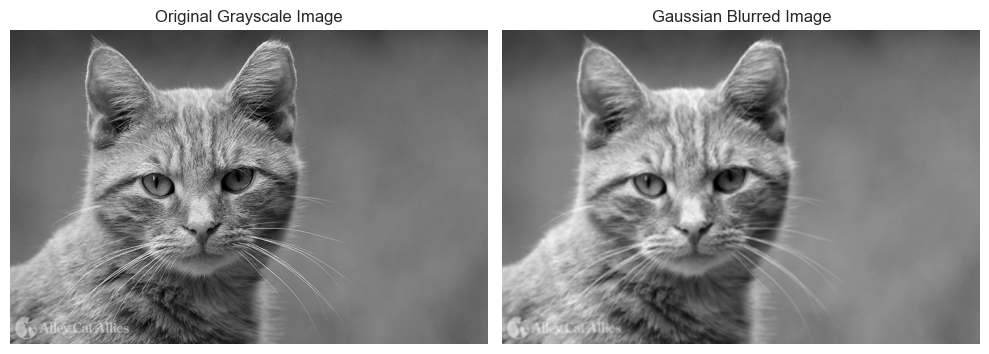

In [ ]:
blurred_image = cv2.GaussianBlur(img_gray, (3, 3), 0)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(img_gray, cmap='gray')
axes[0].set_title("Original Grayscale Image")
axes[0].axis('off')

axes[1].imshow(blurred_image, cmap='gray')
axes[1].set_title("Gaussian Blurred Image")
axes[1].axis('off')

plt.tight_layout()
plt.show()

### 2. Sharpening Filters (High-pass filters)
**Konsep:**
Sharpening filters digunakan untuk meningkatkan tepi dan detail dalam citra. Filter ini bekerja dengan menonjolkan perbedaan antara piksel pusat dan tetangganya, sehingga membuat tepi lebih jelas.

**Implementasi:**
```python
# Menggunakan kernel sharpening sebagai contoh
kernel = np.array([[0, -1, 0], [-1, 5,-1], [0, -1, 0]])
sharpened = cv2.filter2D(img, -1, kernel)
```

**`filter2D()`**
Fungsi ini menerapkan filter konvolusi pada citra menggunakan kernel yang ditentukan. Parameter pertama adalah citra input, parameter kedua adalah kedalaman output (-1 berarti sama dengan input), dan parameter ketiga adalah kernel filter.

Parameter:
- `img`: Citra input yang akan di-sharpen.
- `-1`: Kedalaman output (sama dengan input).
- `kernel`: Kernel sharpening yang digunakan untuk filter.

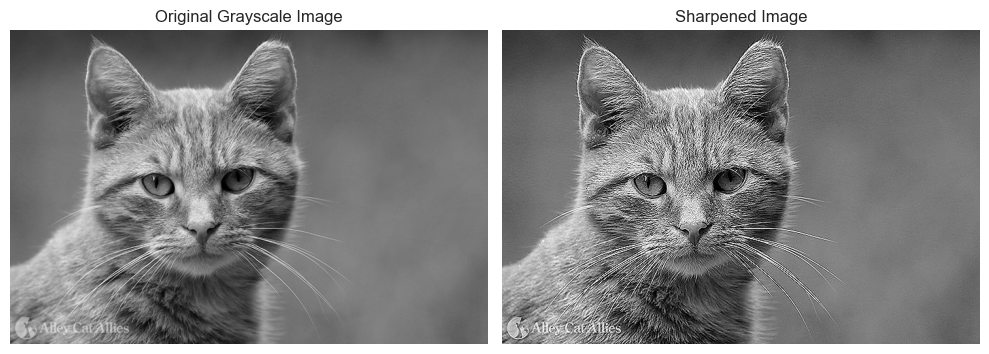

In [15]:
kernel = np.array([[0, -1, 0], [-1, 5,-1], [0, -1, 0]])
sharpened_image = cv2.filter2D(img_gray, -1, kernel)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img_gray, cmap='gray')
axes[0].set_title("Original Grayscale Image")
axes[0].axis('off')

axes[1].imshow(sharpened_image, cmap='gray')
axes[1].set_title("Sharpened Image")
axes[1].axis('off')

plt.tight_layout()
plt.show()

### 3. Edge Detection Filters
**Konsep:**
Edge detection filters digunakan untuk mendeteksi tepi dalam citra dengan menyoroti perubahan tajam dalam intensitas piksel. Filter ini sering digunakan dalam analisis citra untuk mengenali objek.

**Implementasi:**
```python
# Menggunakan kernel edge detection sebagai contoh
kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
edges = cv2.filter2D(img, -1, kernel)
```	

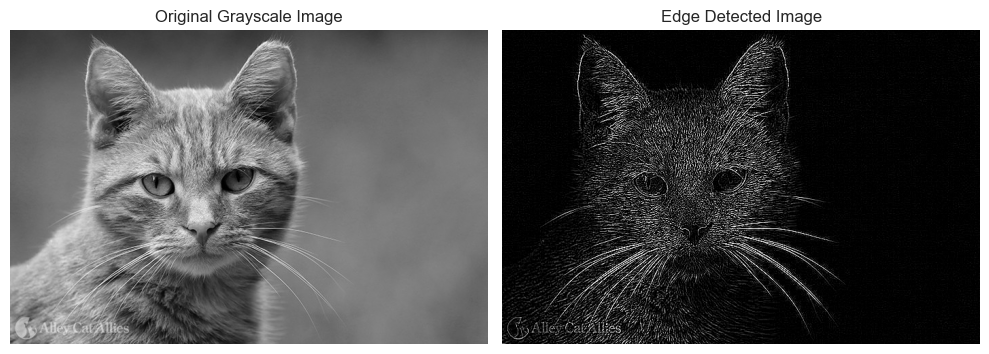

In [16]:
kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
edge_detected_image = cv2.filter2D(img_gray, -1, kernel)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(img_gray, cmap='gray')
axes[0].set_title("Original Grayscale Image")
axes[0].axis('off')

axes[1].imshow(edge_detected_image, cmap='gray')
axes[1].set_title("Edge Detected Image")
axes[1].axis('off')

plt.tight_layout()
plt.show()

### 4. Embossing Filters
**Konsep:**
Embossing filters memberikan efek timbul pada citra dengan menyoroti tepi dan memberikan bayangan. Filter ini menciptakan ilusi kedalaman dengan mengubah intensitas piksel berdasarkan tetangganya.

**Implementasi:**
```python
# Menggunakan kernel embossing sebagai contoh
kernel = np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]])
embossed = cv2.filter2D(img, -1, kernel)
```

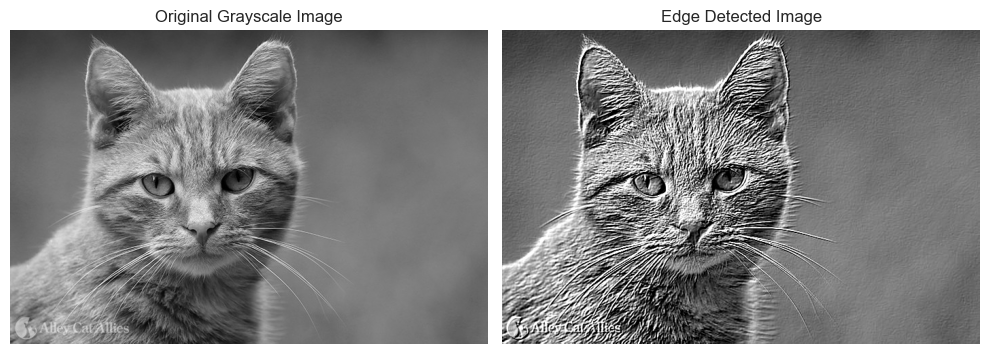

In [18]:
kernel = np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]])
edge_detected_image = cv2.filter2D(img_gray, -1, kernel)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img_gray, cmap='gray')
axes[0].set_title("Original Grayscale Image")
axes[0].axis('off')

axes[1].imshow(edge_detected_image, cmap='gray')
axes[1].set_title("Edge Detected Image")
axes[1].axis('off')

plt.tight_layout()
plt.show()

### 5. Custom Convolution Filters
**Konsep:**
Custom convolution filters memungkinkan pengguna untuk membuat kernel mereka sendiri sesuai dengan kebutuhan spesifik. Ini memberikan fleksibilitas dalam menerapkan berbagai efek pada citra.
**Implementasi:**
```python
# Membuat kernel custom sebagai contoh
custom_kernel = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
custom_filtered = cv2.filter2D(img, -1, custom_kernel)
```

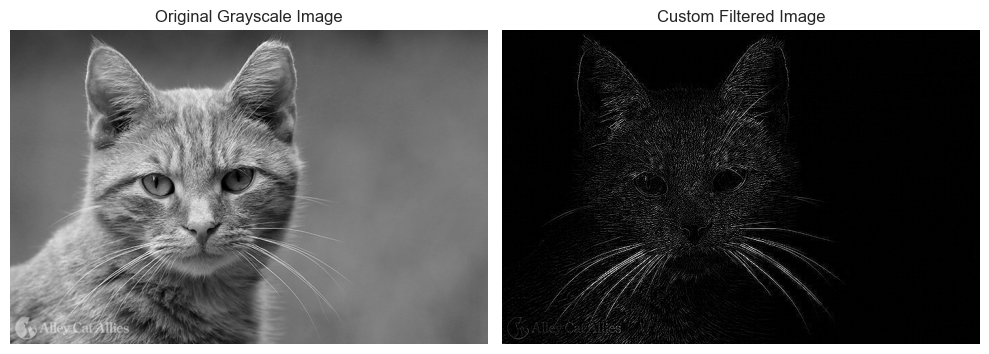

In [19]:
custom_kernel = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
custom_filtered = cv2.filter2D(img_gray, -1, custom_kernel)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img_gray, cmap='gray')
axes[0].set_title("Original Grayscale Image")
axes[0].axis('off')

axes[1].imshow(custom_filtered, cmap='gray')
axes[1].set_title("Custom Filtered Image")
axes[1].axis('off')

plt.tight_layout()
plt.show()